In [12]:
import pandas_datareader.data as pdr
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt



In [13]:
import yfinance as yf
yf.pdr_override()
df_tesla = pdr.get_data_yahoo('TSLA')

[*********************100%***********************]  1 of 1 completed


In [14]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500
2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500
2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000
2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000
2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500


## Simple moving average

<Axes: xlabel='Date'>

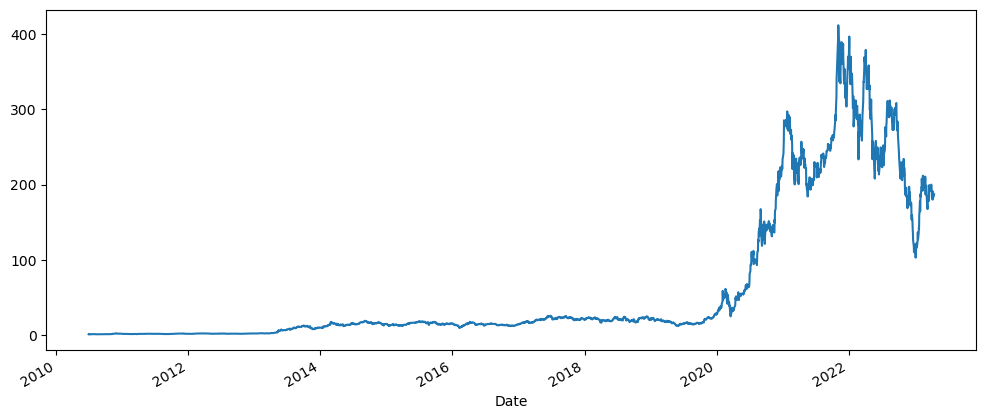

In [15]:
df_tesla['Open'].plot(figsize=(12,5))

In [16]:
df_tesla['Open: 10 days rolling'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<Axes: xlabel='Date'>

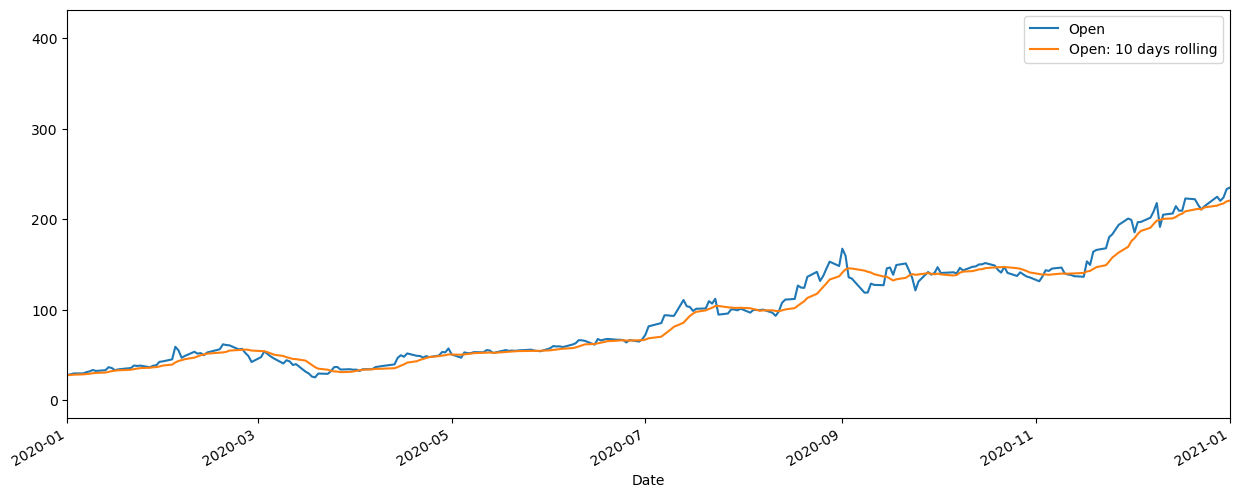

In [17]:
df_tesla[['Open','Open: 10 days rolling']].plot(xlim =['2020-01-01','2021-01-01'], figsize=(15,6))

In [18]:
df_tesla['Open: 20 days rolling'] = df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open: 30 days rolling'] = df_tesla['Open'].rolling(window=30,min_periods=1).mean()
df_tesla['Open: 40 days rolling'] = df_tesla['Open'].rolling(window=40,min_periods=1).mean()
df_tesla['Open: 50 days rolling'] = df_tesla['Open'].rolling(window=50,min_periods=1).mean()

<Axes: xlabel='Date'>

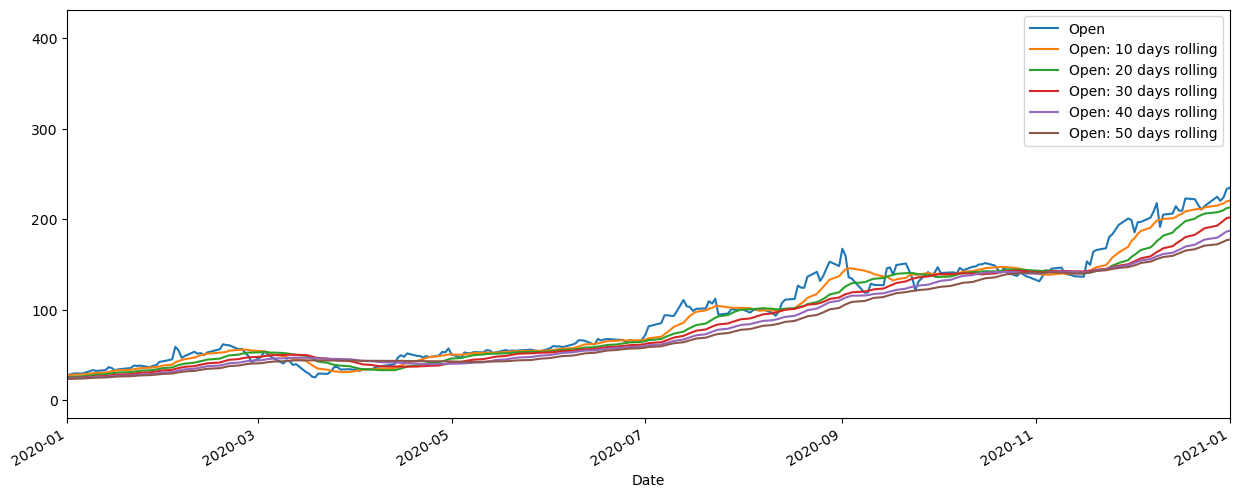

In [19]:
df_tesla[['Open','Open: 10 days rolling','Open: 20 days rolling','Open: 30 days rolling','Open: 40 days rolling','Open: 50 days rolling']].plot(xlim =['2020-01-01','2021-01-01'], figsize=(15,6))

<Axes: xlabel='Date'>

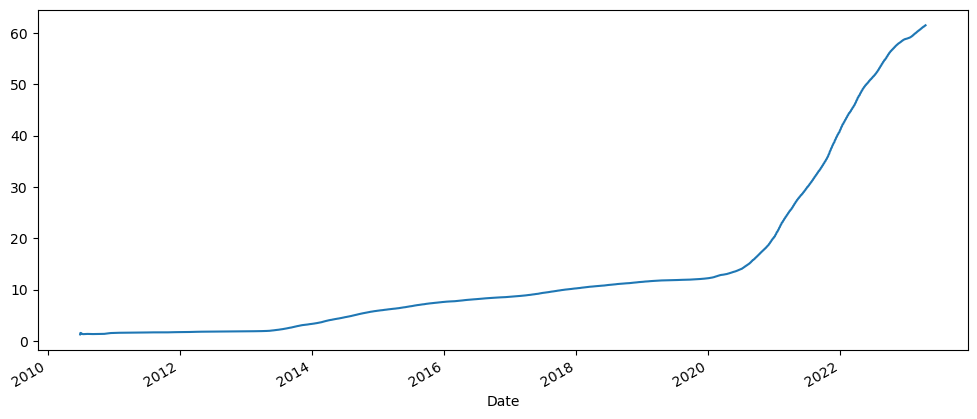

In [20]:
## Expanding
### CMA (Cummulative moving average)
df_tesla['Open'].expanding().mean().plot(figsize=(12,5))

In [25]:
## EWMA (Exponential moving average)
### smoothing factor = 0.1
df_tesla['EMA_0.1'] = df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()


<Axes: xlabel='Date'>

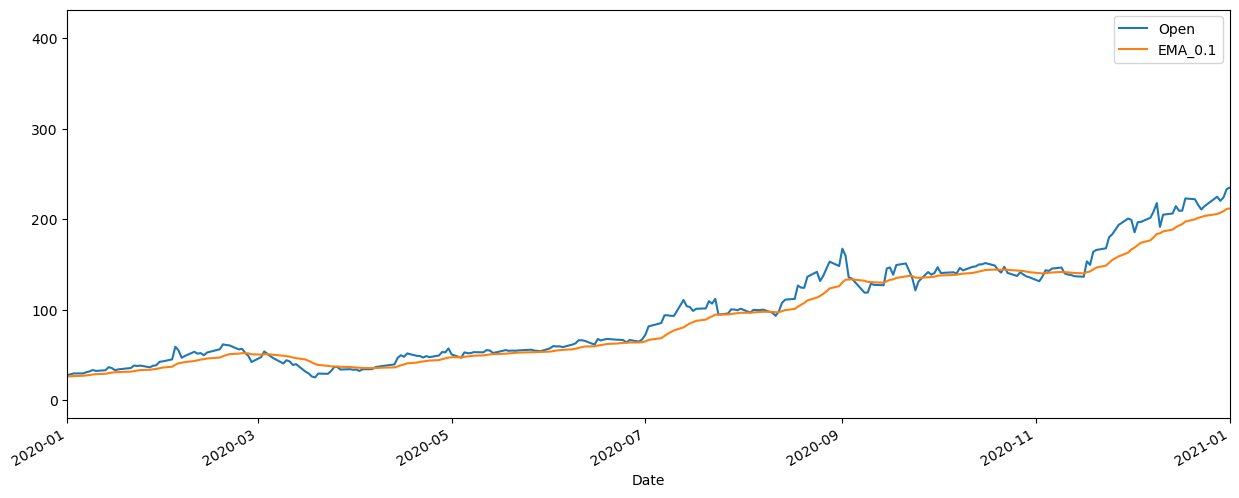

In [26]:
df_tesla[['Open','EMA_0.1']].plot(xlim =['2020-01-01','2021-01-01'], figsize=(15,6))

In [27]:
df_tesla['EMA_0.3'] = df_tesla['Open'].ewm(alpha=0.3,adjust=False).mean()


<Axes: xlabel='Date'>

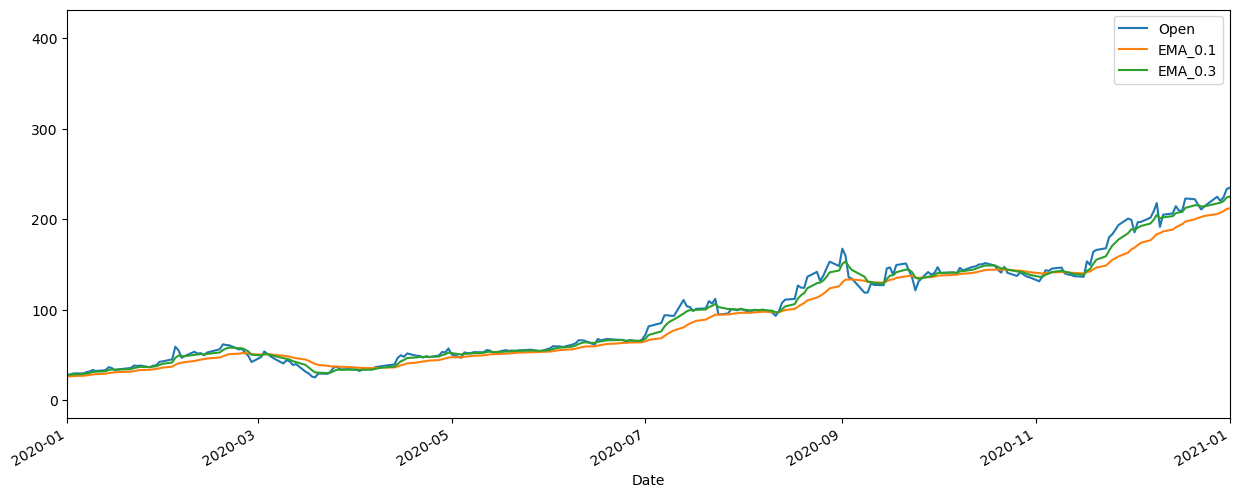

In [28]:
df_tesla[['Open','EMA_0.1','EMA_0.3']].plot(xlim =['2020-01-01','2021-01-01'], figsize=(15,6))

In [29]:
## Exponential weighted moving average (EWMA)
df_tesla['EWMA 5 days'] = df_tesla['Open'].ewm(span=5).mean()


<Axes: xlabel='Date'>

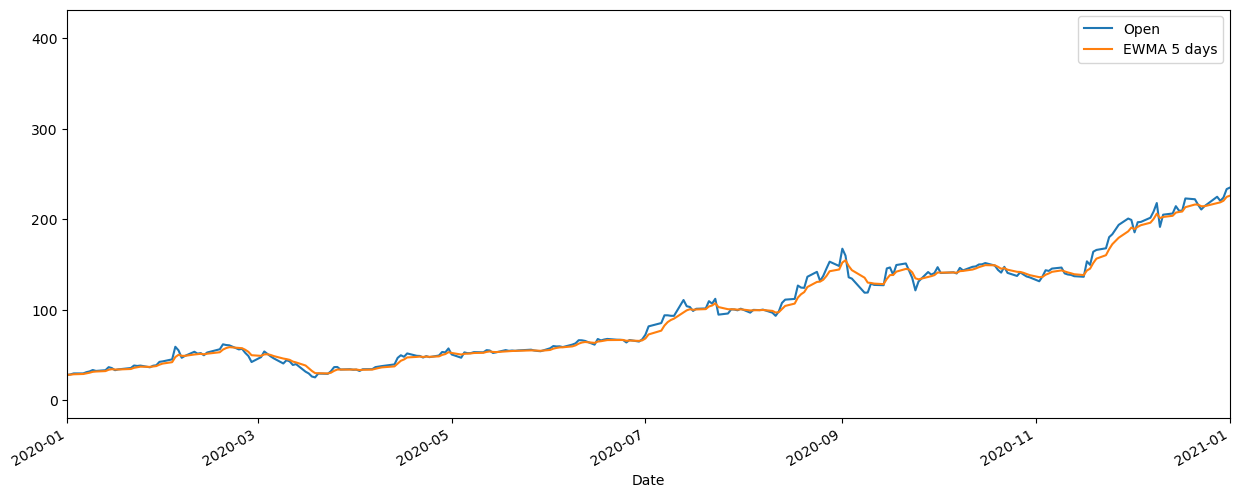

In [30]:
df_tesla[['Open','EWMA 5 days']].plot(xlim =['2020-01-01','2021-01-01'], figsize=(15,6))